In [19]:
#READING CSV
import pandas as pd
from copy import deepcopy
from google.colab import drive 
drive.mount('/content/gdrive')

almacenes = pd.read_csv("/content/gdrive/MyDrive/Trabajos 7mo Ciclo/Complejidad/almacenes.csv")
alm = almacenes[['Coord X', 'Coord Y']]
nodeTypeALM = [1]*100
alm['NodeType'] = nodeTypeALM

puntos_entrega = pd.read_csv("/content/gdrive/MyDrive/Trabajos 7mo Ciclo/Complejidad/puntos_entrega.csv")
pe = puntos_entrega[['Coord X', 'Coord Y']]
nodeTypePE = [2]*5000
pe['NodeType'] = nodeTypePE

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [38]:
#Join both lists
newDF = pd.concat([alm, pe])

#List to use (nodeType) and list to compare (noType)
nodeTypeList = newDF[['Coord X', 'Coord Y', 'NodeType']].values.tolist()
noTypeList = newDF[['Coord X', 'Coord Y']].values.tolist()

In [58]:
#Sorting List by Y then by X
def orderList(list_):
    newL = sorted(list_, key=lambda y: y[1])
    newL.sort(key=lambda x: x[0])
    return deepcopy(newL)

newL = orderList(noTypeList)
newTypeList = orderList(nodeTypeList)

In [89]:
# Storage/DeliveryPoint Nodes to append
def popStuff(popList, times):
    to_return = []
    popList.reverse()
    for j in range(times):
        to_return.append(popList.pop())
    popList.reverse()
    return to_return

#Search X Coords Nodes (it's sorted already)
def searchX(tempList, tempNodeTypeList, x):
    returnList = []
    popped = []
    max = 0

    if len(tempList)==0 and len(tempNodeTypeList)==0:
        return returnList, popped
    for i in tempList: #Getting comparison list
        if i[0] == x:
            max += 1
            returnList.append(i)
        else:
            break
    
    popStuff(tempList, max)
    popped = []
    popped = popStuff(tempNodeTypeList, max)
    return returnList, popped

In [94]:
# Create graph
def graph(nodesList, newL_, newTypeList_):
    xList = [i for i in range(1000)]
    yList = [i for i in range(1000)]
    nodesCont = 0

    tempNoTypeList = deepcopy(newL_)
    tempTypeList = deepcopy(newTypeList_)

    for x in xList:
        smallList = [] #Comparison list
        popped = [] #To List
        if len(tempNoTypeList)>0 and len(tempTypeList)>0:
            smallList, popped = searchX(tempNoTypeList, tempTypeList, x)
        for y in yList:
            ady1 = nodesCont - 1000 #left then goes clockwise
            ady2 = nodesCont - 1
            ady3 = nodesCont + 1000
            ady4 = nodesCont + 1
            # Validations - not corners
            if x == 0: ady1 = -1
            if x == 999: ady3 = -1
            if y == 0: ady2 = -1
            if y == 999: ady4 = -1

            ady0 = [ady1, ady2, ady3, ady4]

            if len(popped) > 0 and len(smallList) > 0 and [x, y] in smallList:
                t = popped.pop(0)
                nodesList.append([t[0], t[1], t[2], ady0])
            else:
                nodesList.append([x, y, 0, ady0])
            
            nodesCont += 1

In [95]:
# Creating the new graph
nodes = []
graph(nodes, newL, newTypeList)

In [96]:
def print_nodes(aeaList):
    for i in range(1000):
        print(aeaList[i])
    print(len(aeaList))

#print_nodes(nodesList)
def print_corners(aeaList):
    for i in range(0, 5):
        print(aeaList[i])
        print(aeaList[-i])

print_corners(nodes)

[0, 0, 0, [-1, -1, 1000, 1]]
[0, 0, 0, [-1, -1, 1000, 1]]
[0, 1, 0, [-1, 0, 1001, 2]]
[999, 999, 0, [998999, 999998, -1, -1]]
[0, 2, 0, [-1, 1, 1002, 3]]
[999, 998, 0, [998998, 999997, -1, 999999]]
[0, 3, 0, [-1, 2, 1003, 4]]
[999, 997, 0, [998997, 999996, -1, 999998]]
[0, 4, 0, [-1, 3, 1004, 5]]
[999, 996, 0, [998996, 999995, -1, 999997]]


In [97]:
nodes_copy = deepcopy(nodes)
new_nodes = sorted(nodes_copy, key=lambda y: y[2])

In [98]:
def popStuffAndDelete(popList, times):
    to_return = []
    popList.reverse()
    for j in range(times):
        popped = popList.pop()
        del popped[3]
        del popped[2]
        to_return.append(popped)
    popList.reverse()
    return to_return

def deleteStuff(nodesList):
    for i in nodesList:
        del i[3]
        del i[2]

def separateTypes(tempNodes, x):
    max = 0
    for i in tempNodes:
        if i[2] == x:
            max += 1
        else:
            popped = popStuffAndDelete(tempNodes, max)
            return popped

In [99]:
new_nodes_copy = deepcopy(new_nodes)

normal_nodes = separateTypes(new_nodes_copy, 0)
alm_nodes = separateTypes(new_nodes_copy, 1)
ent_nodes = new_nodes_copy
deleteStuff(ent_nodes)

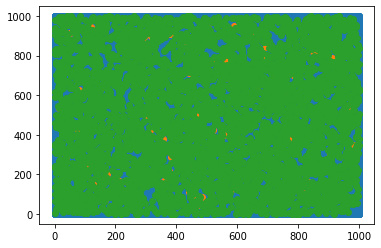

In [100]:
import matplotlib.pyplot as plt
import numpy as np

normal_np = np.array(normal_nodes)
alm_np = np.array(alm_nodes)
ent_np = np.array(ent_nodes)

plt.scatter(*zip(*normal_np))
plt.scatter(*zip(*alm_np))
plt.scatter(*zip(*ent_np))

cm = 1/2.54
plt.rcParams["figure.figsize"] = [60*cm, 30*cm]
plt.rcParams["figure.autolayout"] = True
plt.show()

In [101]:
# Making a copy of resulting graph
nodes_copy = deepcopy(nodes)

In [102]:
# BFS since all edges have the same weight (among all nodes)
def bfs(graph, s, size):
    visited = [False]*size
    parent = [None]*size
    queue = [s]
    visited[s] = True

    while queue:
        u = queue.pop(0)
        node = graph[u]
        for v in node[3]:
            if v >= 0:
                if not visited[v]:
                    visited[v] = True
                    parent[v] = u
                    queue.append(v)

    return parent

In [104]:
path = bfs(nodes_copy, 0, len(nodes_copy)) #Creating all paths

print(len(path))

1000000


In [110]:
# Dijkstra desde cada almacen a todos los puntos de entrega. BFS since all edges have the same weight

# Partir de un nodo Storage a todos los nodos Delivery
# 1. Verificar que sea Storage y hacer una lista de paths para cada nodo Delivery
# 2. Esto resultará en una lista de 5000 rutas por cada Storage (100 listas en total)

def find_route(all_routes, alm_node, ent_node):
    start_node = all_routes[ent_node] #returns parent
    #ir desde ent_node hasta alm_node con un while hasta que encuentre el nodo que necesita
    #Las rutas se obtienen recorriendo las rutas generales de manera inversa
    route = []
    route.append(ent_node)

    if start_node == alm_node: #Comprueba si son nodos adyacentes
        route.append(alm_node)
        route.reverse()
        return route

    while start_node != alm_node: #Recorre los padres desde el punto de entrega hasta el almacén (inversamente)
        route.append(start_node)
        start_node = all_routes[start_node]

    route.append(alm_node)
    route.reverse()
    return route #returns 1 route

def find_nodes(graph, node_type, max):
    nodes = []
    cont_ent = 0
    size = len(graph)
    for i in range(size):
        if graph[i][2] == node_type:
            nodes.append(i)
            cont_ent += 1
        if cont_ent == max:
            return nodes #returns all nodes of that type

def all_routes_from_alm(graph, alm_node, size, ent_nodes_list):
    routes = []
    parent = bfs(graph, alm_node, size)

    for i in range(len(ent_nodes_list)): #ent_nodes
        route = []
        route.append(alm_node)
        route.append(ent_nodes_list[i])
        route.append(find_route(parent, alm_node, ent_nodes_list[i]))
        routes.append(route)

    return routes #returns 5k routes of that Storage node

def bfs_alm(graph, size): #Only asking to every Storage node
    routes = []
    cont_alm = 0
    alm_nodes_list = find_nodes(graph, 1, 100) #alm = 1 / ent = 2
    ent_nodes_list = find_nodes(graph, 2, 5000) #alm = 1 / ent = 2

    for i in range(len(alm_nodes_list)):
        routes.append(all_routes_from_alm(graph, alm_nodes_list[i], size, ent_nodes_list))

    return routes #returns 5k * 100 routes

In [111]:
routes = bfs_alm(nodes_copy, len(nodes_copy))

In [112]:
for i in range(5):
    print(routes[0][i])
print(len(routes))

[16535, 103, [16535, 15535, 14535, 13535, 12535, 11535, 10535, 9535, 8535, 7535, 6535, 5535, 4535, 3535, 2535, 1535, 535, 534, 533, 532, 531, 530, 529, 528, 527, 526, 525, 524, 523, 522, 521, 520, 519, 518, 517, 516, 515, 514, 513, 512, 511, 510, 509, 508, 507, 506, 505, 504, 503, 502, 501, 500, 499, 498, 497, 496, 495, 494, 493, 492, 491, 490, 489, 488, 487, 486, 485, 484, 483, 482, 481, 480, 479, 478, 477, 476, 475, 474, 473, 472, 471, 470, 469, 468, 467, 466, 465, 464, 463, 462, 461, 460, 459, 458, 457, 456, 455, 454, 453, 452, 451, 450, 449, 448, 447, 446, 445, 444, 443, 442, 441, 440, 439, 438, 437, 436, 435, 434, 433, 432, 431, 430, 429, 428, 427, 426, 425, 424, 423, 422, 421, 420, 419, 418, 417, 416, 415, 414, 413, 412, 411, 410, 409, 408, 407, 406, 405, 404, 403, 402, 401, 400, 399, 398, 397, 396, 395, 394, 393, 392, 391, 390, 389, 388, 387, 386, 385, 384, 383, 382, 381, 380, 379, 378, 377, 376, 375, 374, 373, 372, 371, 370, 369, 368, 367, 366, 365, 364, 363, 362, 361, 360, 359